<a href="https://colab.research.google.com/github/pachterlab/seqspec/blob/main/examples/parse_genbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip --quiet install seqspec biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import json
def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
    ax.set_aspect("equal")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax


fsize = 20
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["font.size"] = fsize
%config InlineBackend.figure_format = 'retina'

In [3]:
gb = """LOCUS       Exported                7203 bp ds-DNA     circular SYN 12-MAY-2021
DEFINITION  Expresses Cre recombinase and Renilla luciferase from the EFS
            promoter and three U6-driven sgRNAs targeting Kras, p53, and Lkb1.
            Contains KrasG12D HDR donor. AAV backbone..
ACCESSION   .
VERSION     .
KEYWORDS
                AAV:ITR-U6-sgRNA(Kras)-U6-sgRNA(p53)-U6-sgRNA(Lkb1)-pEFS-...
SOURCE      synthetic DNA construct
  ORGANISM  synthetic DNA construct
REFERENCE   1  (bases 1 to 7203)
  AUTHORS   Platt RJ, Chen S, Zhou Y, Yim MJ, Swiech L, Kempton HR, Dahlman JE,
            Parnas O, Eisenhaure TM, Jovanovic M, Graham DB, Jhunjhunwala S,
            Heidenreich M, Xavier RJ, Langer R, Anderson DG, Hacohen N, Regev A,
            Feng G, Sharp PA, Zhang F
  TITLE     CRISPR-Cas9 Knockin Mice for Genome Editing and Cancer Modeling.
  JOURNAL   Cell. 2014 Sep 24. pii: S0092-8674(14)01163-5. doi:
            10.1016/j.cell.2014.09.014.
  PUBMED    25263330
REFERENCE   2  (bases 1 to 7203)
  AUTHORS   .
  TITLE     Direct Submission
  JOURNAL   Exported May 12, 2021 from SnapGene Server 1.1.58
            http://www.snapgene.com
FEATURES             Location/Qualifiers
     source          1..7203
                     /organism="synthetic DNA construct"
                     /mol_type="other DNA"
     repeat_region   1..141
                     /label=AAV2 ITR
                     /note="inverted terminal repeat of adeno-associated virus
                     serotype 2"
     repeat_region   12..141
                     /label=AAV2 ITR
     promoter        156..396
                     /label=U6 promoter
                     /note="RNA polymerase III promoter for human U6 snRNA"
     misc_RNA        425..500
                     /label=gRNA scaffold
                     /note="guide RNA scaffold for the Streptococcus pyogenes
                     CRISPR/Cas9 system"
     promoter        513..753
                     /label=U6 promoter
                     /note="RNA polymerase III promoter for human U6 snRNA"
     misc_RNA        782..857
                     /label=gRNA scaffold
                     /note="guide RNA scaffold for the Streptococcus pyogenes
                     CRISPR/Cas9 system"
     promoter        871..1111
                     /label=U6 promoter
                     /note="RNA polymerase III promoter for human U6 snRNA"
     misc_RNA        1140..1215
                     /label=gRNA scaffold
                     /note="guide RNA scaffold for the Streptococcus pyogenes
                     CRISPR/Cas9 system"
     promoter        1270..1481
                     /label=EF-1-alpha core promoter
                     /note="core promoter for human elongation factor
                     EF-1-alpha"
     CDS             1495..2427
                     /codon_start=1
                     /product="luciferase from the anthozoan coelenterate
                     Renilla reniformis (sea pansy)"
                     /label=Rluc
                     /translation="MTSKVYDPEQRKRMITGPQWWARCKQMNVLDSFINYYDSEKHAEN
                     AVIFLHGNAASSYLWRHVVPHIEPVARCIIPDLIGMGKSGKSGNGSYRLLDHYKYLTAW
                     FELLNLPKKIIFVGHDWGACLAFHYSYEHQDKIKAIVHAESVVDVIESWDEWPDIEEDI
                     ALIKSEEGEKMVLENNFFVETMLPSKIMRKLEPEEFAAYLEPFKEKGEVRRPTLSWPRE
                     IPLVKGGKPDVVQIVRNYNAYLRASDDLPKMFIESDPGFFSNAIVEGAKKFPNTEFVKV
                     KGLHFSQEDAPDEMGKYIKSFVERVLKNEQ"
     CDS             2443..2499
                     /codon_start=1
                     /product="2A peptide from porcine teschovirus-1
                     polyprotein"
                     /label=P2A
                     /note="Eukaryotic ribosomes fail to insert a peptide bond
                     between the Gly and Pro residues, yielding separate
                     polypeptides."
                     /translation="ATNFSLLKQAGDVEENPGP"
     CDS             2500..2520
                     /codon_start=1
                     /product="nuclear localization signal of SV40 (simian virus
                     40) large T antigen"
                     /label=SV40 NLS
                     /translation="PKKKRKV"
     CDS             3547..3573
                     /codon_start=1
                     /product="HA (human influenza hemagglutinin) epitope tag"
                     /label=HA
                     /translation="YPYDVPDYA"
     repeat_region   4466..4606
                     /label=AAV2 ITR
                     /note="inverted terminal repeat of adeno-associated virus
                     serotype 2"
     repeat_region   4466..4595
                     /label=AAV2 ITR
     rep_origin      4681..5136
                     /direction=RIGHT
                     /label=f1 ori
                     /note="f1 bacteriophage origin of replication; arrow
                     indicates direction of (+) strand synthesis"
     primer_bind     complement(4768..4787)
                     /label=F1ori-R
                     /note="F1 origin, reverse primer"
     primer_bind     4978..4999
                     /label=F1ori-F
                     /note="F1 origin, forward primer"
     primer_bind     complement(5153..5172)
                     /label=pRS-marker
                     /note="pRS vectors, use to sequence yeast selectable
                     marker"
     primer_bind     5272..5294
                     /label=pGEX 3'
                     /note="pGEX vectors, reverse primer"
     primer_bind     complement(5332..5350)
                     /label=pBRforEco
                     /note="pBR322 vectors, upsteam of EcoRI site, forward
                     primer"
     promoter        5418..5522
                     /gene="bla"
                     /label=AmpR promoter
     CDS             5523..6383
                     /codon_start=1
                     /gene="bla"
                     /product="beta-lactamase"
                     /label=AmpR
                     /note="confers resistance to ampicillin, carbenicillin, and
                     related antibiotics"
                     /translation="MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYI
                     ELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRIDAGQEQLGRRIHYSQNDLVEYS
                     PVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRW
                     EPELNEAIPNDERDTTMPVAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSA
                     LPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGAS
                     LIKHW"
     primer_bind     complement(5741..5760)
                     /label=Amp-R
                     /note="Ampicillin resistance gene, reverse primer"
     rep_origin      6554..7142
                     /direction=RIGHT
                     /label=ori
                     /note="high-copy-number ColE1/pMB1/pBR322/pUC origin of
                     replication"
     primer_bind     7043..7062
                     /label=pBR322ori-F
                     /note="pBR322 origin, forward primer"
ORIGIN
        1 cctgcaggca gctgcgcgct cgctcgctca ctgaggccgc ccgggcaaag cccgggcgtc
       61 gggcgacctt tggtcgcccg gcctcagtga gcgagcgagc gcgcagagag ggagtggcca
      121 actccatcac taggggttcc tgcggccgca cgcgtgaggg cctatttccc atgattcctt
      181 catatttgca tatacgatac aaggctgtta gagagataat tggaattaat ttgactgtaa
      241 acacaaagat attagtacaa aatacgtgac gtagaaagta ataatttctt gggtagtttg
      301 cagttttaaa attatgtttt aaaatggact atcatatgct taccgtaact tgaaagtatt
      361 tcgatttctt ggctttatat atcttgtgga aaggacgaaa caccgcagcg ttacctctat
      421 cgtagtttta gagctagaaa tagcaagtta aaataaggct agtccgttat caacttgaaa
      481 aagtggcacc gagtcggtgc ttttttggat ccgagggcct atttcccatg attccttcat
      541 atttgcatat acgatacaag gctgttagag agataattgg aattaatttg actgtaaaca
      601 caaagatatt agtacaaaat acgtgacgta gaaagtaata atttcttggg tagtttgcag
      661 ttttaaaatt atgttttaaa atggactatc atatgcttac cgtaacttga aagtatttcg
      721 atttcttggc tttatatatc ttgtggaaag gacgaaacac cgtgtaatag ctcctgcatg
      781 ggttttagag ctagaaatag caagttaaaa taaggctagt ccgttatcaa cttgaaaaag
      841 tggcaccgag tcggtgcttt ttttctagaa gagggcctat ttcccatgat tccttcatat
      901 ttgcatatac gatacaaggc tgttagagag ataattggaa ttaatttgac tgtaaacaca
      961 aagatattag tacaaaatac gtgacgtaga aagtaataat ttcttgggta gtttgcagtt
     1021 ttaaaattat gttttaaaat ggactatcat atgcttaccg taacttgaaa gtatttcgat
     1081 ttcttggctt tatatatctt gtggaaagga cgaaacacca ctccgagacc ttatgccgcg
     1141 ttttagagct agaaatagca agttaaaata aggctagtcc gttatcaact tgaaaaagtg
     1201 gcaccgagtc ggtgcttttt tggtaccagg tcttgaaagg agtgggaatt ggctccggtg
     1261 cccgtcagtg ggcagagcgc acatcgccca cagtccccga gaagttgggg ggaggggtcg
     1321 gcaattgaac cggtgcctag agaaggtggc gcggggtaaa ctgggaaagt gatgtcgtgt
     1381 actggctccg cctttttccc gagggtgggg gagaaccgta tataagtgca gtagtcgccg
     1441 tgaacgttct ttttcgcaac gggtttgccg ccagaacaca ggcgtacggc caccatgact
     1501 tcgaaagttt atgatccaga acaaaggaaa cggatgataa ctggtccgca gtggtgggcc
     1561 agatgtaaac aaatgaatgt tcttgattca tttattaatt attatgattc agaaaaacat
     1621 gcagaaaatg ctgttatttt tttacatggt aacgcggcct cttcttattt atggcgacat
     1681 gttgtgccac atattgagcc agtagcgcgg tgtattatac cagaccttat tggtatgggc
     1741 aaatcaggca aatctggtaa tggttcttat aggttacttg atcattacaa atatcttact
     1801 gcatggtttg aacttcttaa tttaccaaag aagatcattt ttgtcggcca tgattggggt
     1861 gcttgtttgg catttcatta tagctatgag catcaagata agatcaaagc aatagttcac
     1921 gctgaaagtg tagtagatgt gattgaatca tgggatgaat ggcctgatat tgaagaagat
     1981 attgcgttga tcaaatctga agaaggagaa aaaatggttt tggagaataa cttcttcgtg
     2041 gaaaccatgt tgccatcaaa aatcatgaga aagttagaac cagaagaatt tgcagcatat
     2101 cttgaaccat tcaaagagaa aggtgaagtt cgtcgtccaa cattatcatg gcctcgtgaa
     2161 atcccgttag taaaaggtgg taaacctgac gttgtacaaa ttgttaggaa ttataatgct
     2221 tatctacgtg caagtgatga tttaccaaaa atgtttattg aatcggaccc aggattcttt
     2281 tccaatgcta ttgttgaagg tgccaagaag tttcctaata ctgaatttgt caaagtaaaa
     2341 ggtcttcatt tttcgcaaga agatgcacct gatgaaatgg gaaaatatat caaatcgttc
     2401 gttgagcgag ttctcaaaaa tgaacaagct agcggaagcg gagccactaa cttctccctg
     2461 ttgaaacaag caggggatgt cgaagagaat cccgggccac ccaagaagaa gaggaaggtg
     2521 tccaatctcc tgactgttca ccagaacctc cctgcgctgc cagtagatgc cactagcgat
     2581 gaggtcagga aaaatctcat ggatatgttt agggatagac aggcgttttc tgaacacacc
     2641 tggaaaatgc tgcttagcgt gtgccgatcc tgggcagcct ggtgtaagct gaacaatcgc
     2701 aaatggttcc ccgccgagcc ggaggacgtg cgcgattacc tgctgtatct ccaggcaaga
     2761 gggctggctg tcaagactat ccagcagcac ttgggccaac tgaatatgct gcatcgacgc
     2821 agcgggctcc cccggcctag cgattcaaac gcagtctccc ttgttatgag gagaattaga
     2881 aaggaaaacg tagatgcggg tgagagggct aagcaggctc tcgcttttga gcggactgat
     2941 ttcgaccagg tcagatccct gatggagaac agcgatcggt gccaggacat caggaacctc
     3001 gcatttctgg gaattgcata taacacactt ctgcgcatag ctgagatcgc ccggatcaga
     3061 gtgaaagaca tcagtcgaac ggacggcggc cggatgctta ttcatattgg acgcacaaag
     3121 acattggtca gcaccgctgg cgttgaaaag gccttgtccc tgggcgtaac gaagctggtg
     3181 gaaagatgga tctcagtgtc cggcgtggct gacgacccta ataattactt gttctgtcga
     3241 gtgagaaaaa acggagtcgc cgcgccctct gccaccagcc aattgagtac acgggccctt
     3301 gaagggatct ttgaggcaac ccaccgactc atatacggag ccaaggatga cagtggccag
     3361 aggtatctcg cctggtcagg tcattctgct agggtggggg ccgcacgaga catggcgcgg
     3421 gcaggagtct ccataccaga gattatgcaa gctggaggtt ggacaaatgt gaacatcgtt
     3481 atgaactata tccgcaatct tgactctgaa accggggcca tggtgagact gctcgaagat
     3541 ggtgactacc catacgatgt tccagattac gcttaaagcg ctaataaaag atctttattt
     3601 tcattagatc tgtgtgttgg ttttttgtgt aagctttggc tccaacacag atgttcttag
     3661 gctacctaac ttctaacttt taatatccag tcaacaaaga ataccgcaag ggtaggtgtt
     3721 gggatagctg tcgacaagct catgcgggtg tgtccacagg gtatagcgta ctatgcagaa
     3781 tatttgtact gagtgaagtc atgatacatt cctttgagag ccattagctg ctacaaaaca
     3841 gtaatctggc tgtttagatc aacaagctaa atgatagaag atgaaagtac tggtttccat
     3901 gtatttttat taagtgttga tgagaaagtt gtaagtgact tacaggttac tctgtacatc
     3961 tgtagtcact gaattcggaa tatcttagag ttttacacac aaaggtgagt gttaaaatat
     4021 tgataaagtt tttgataatc ttgtgtgaga catgttctaa tttagttgta ttttattatt
     4081 tttattgtaa ggcctgctga aaatgactga gtataaactt gtggtcgtgg gcgccgacgg
     4141 cgtgggcaag agcgctttga cgatacagct aattcagaat cactttgtgg atgagtatga
     4201 tccaaccatc gaggtaacgc tgctctacag tctgcgtgcg cttgtaaagg acggcagcca
     4261 gccgctttga aaaagatatc atttttatat ttattagaaa attatattga aagttatttc
     4321 agttatatgt gatgtccttt agttccaagg ctttaaactg ggtgttaggg aaccataggt
     4381 gcaagaaagt ccacttctca tgagagctca ccacagagaa agaaagtcca cttctcaggt
     4441 aaccacgtgc ggaccgagcg gccgcaggaa cccctagtga tggagttggc cactccctct
     4501 ctgcgcgctc gctcgctcac tgaggccggg cgaccaaagg tcgcccgacg cccgggcttt
     4561 gcccgggcgg cctcagtgag cgagcgagcg cgcagctgcc tgcaggggcg cctgatgcgg
     4621 tattttctcc ttacgcatct gtgcggtatt tcacaccgca tacgtcaaag caaccatagt
     4681 acgcgccctg tagcggcgca ttaagcgcgg cgggtgtggt ggttacgcgc agcgtgaccg
     4741 ctacacttgc cagcgcccta gcgcccgctc ctttcgcttt cttcccttcc tttctcgcca
     4801 cgttcgccgg ctttccccgt caagctctaa atcgggggct ccctttaggg ttccgattta
     4861 gtgctttacg gcacctcgac cccaaaaaac ttgatttggg tgatggttca cgtagtgggc
     4921 catcgccctg atagacggtt tttcgccctt tgacgttgga gtccacgttc tttaatagtg
     4981 gactcttgtt ccaaactgga acaacactca accctatctc gggctattct tttgatttat
     5041 aagggatttt gccgatttcg gcctattggt taaaaaatga gctgatttaa caaaaattta
     5101 acgcgaattt taacaaaata ttaacgttta caattttatg gtgcactctc agtacaatct
     5161 gctctgatgc cgcatagtta agccagcccc gacacccgcc aacacccgct gacgcgccct
     5221 gacgggcttg tctgctcccg gcatccgctt acagacaagc tgtgaccgtc tccgggagct
     5281 gcatgtgtca gaggttttca ccgtcatcac cgaaacgcgc gagacgaaag ggcctcgtga
     5341 tacgcctatt tttataggtt aatgtcatga taataatggt ttcttagacg tcaggtggca
     5401 cttttcgggg aaatgtgcgc ggaaccccta tttgtttatt tttctaaata cattcaaata
     5461 tgtatccgct catgagacaa taaccctgat aaatgcttca ataatattga aaaaggaaga
     5521 gtatgagtat tcaacatttc cgtgtcgccc ttattccctt ttttgcggca ttttgccttc
     5581 ctgtttttgc tcacccagaa acgctggtga aagtaaaaga tgctgaagat cagttgggtg
     5641 cacgagtggg ttacatcgaa ctggatctca acagcggtaa gatccttgag agttttcgcc
     5701 ccgaagaacg ttttccaatg atgagcactt ttaaagttct gctatgtggc gcggtattat
     5761 cccgtattga cgccgggcaa gagcaactcg gtcgccgcat acactattct cagaatgact
     5821 tggttgagta ctcaccagtc acagaaaagc atcttacgga tggcatgaca gtaagagaat
     5881 tatgcagtgc tgccataacc atgagtgata acactgcggc caacttactt ctgacaacga
     5941 tcggaggacc gaaggagcta accgcttttt tgcacaacat gggggatcat gtaactcgcc
     6001 ttgatcgttg ggaaccggag ctgaatgaag ccataccaaa cgacgagcgt gacaccacga
     6061 tgcctgtagc aatggcaaca acgttgcgca aactattaac tggcgaacta cttactctag
     6121 cttcccggca acaattaata gactggatgg aggcggataa agttgcagga ccacttctgc
     6181 gctcggccct tccggctggc tggtttattg ctgataaatc tggagccggt gagcgtgggt
     6241 ctcgcggtat cattgcagca ctggggccag atggtaagcc ctcccgtatc gtagttatct
     6301 acacgacggg gagtcaggca actatggatg aacgaaatag acagatcgct gagataggtg
     6361 cctcactgat taagcattgg taactgtcag accaagttta ctcatatata ctttagattg
     6421 atttaaaact tcatttttaa tttaaaagga tctaggtgaa gatccttttt gataatctca
     6481 tgaccaaaat cccttaacgt gagttttcgt tccactgagc gtcagacccc gtagaaaaga
     6541 tcaaaggatc ttcttgagat cctttttttc tgcgcgtaat ctgctgcttg caaacaaaaa
     6601 aaccaccgct accagcggtg gtttgtttgc cggatcaaga gctaccaact ctttttccga
     6661 aggtaactgg cttcagcaga gcgcagatac caaatactgt ccttctagtg tagccgtagt
     6721 taggccacca cttcaagaac tctgtagcac cgcctacata cctcgctctg ctaatcctgt
     6781 taccagtggc tgctgccagt ggcgataagt cgtgtcttac cgggttggac tcaagacgat
     6841 agttaccgga taaggcgcag cggtcgggct gaacgggggg ttcgtgcaca cagcccagct
     6901 tggagcgaac gacctacacc gaactgagat acctacagcg tgagctatga gaaagcgcca
     6961 cgcttcccga agggagaaag gcggacaggt atccggtaag cggcagggtc ggaacaggag
     7021 agcgcacgag ggagcttcca gggggaaacg cctggtatct ttatagtcct gtcgggtttc
     7081 gccacctctg acttgagcgt cgatttttgt gatgctcgtc aggggggcgg agcctatgga
     7141 aaaacgccag caacgcggcc tttttacggt tcctggcctt ttgctggcct tttgctcaca
     7201 tgt
//
"""
with open("addgene-plasmid-60224-sequence-96390.gbk", 'w') as f:
  f.write(gb)

In [4]:
from Bio import GenBank
with open("addgene-plasmid-60224-sequence-96390.gbk", 'r') as f:
  gb = GenBank.read(f)

In [5]:
feat = []
prev_stop = 0
need_filler = False
label = "source"
idx = 0
for f in gb.features:
  # print(f.__dict__)
  # print(f.qualifiers)
  id = f.key

  if "complement" in f.location:
    start, stop = tuple(map(int, f.location[11:-1].split("..")))
    # convert to 0-index
    start -= 1
  else:
    start, stop = tuple(map(int, f.location.split("..")))
    start -= 1
  length = stop - start
  seq = gb.sequence[start: stop]

  # check if the difference between the prev stop and the curr stop > 1, that seq is filler
  if start - prev_stop > 1:
    # get the seq and make a filler dude
    need_filler = True
    filler = {
        "seq": gb.sequence[prev_stop : start],
        "id": f"filler_{idx}",
        "label": f"filler_{idx}",
        "start": prev_stop,
        "stop": start,
        "length": start - prev_stop,
    }
    idx += 1

  for q in f.qualifiers:
    if q.key == '/label=':
      label = q.value
      break
  if need_filler:
    need_filler = False
    # feat.append(filler)
  feat.append({
      "id": id,
      "label": label,
      "start": start,
      "stop": stop,
      "length": length,
      "seq": seq
  })
  prev_stop = stop

In [6]:
from seqspec.Region import Region

In [21]:
ex = [
    {"id": "A", "start": 0, "stop": 100, "length": 100},
    {"id": "B", "start": 0, "stop": 25, "length": 25},
    {"id": "C", "start": 10, "stop": 15, "length": 5},
    {"id": "D", "start": 50, "stop": 75, "length": 25},
    {"id": "E", "start": 75, "stop": 85, "length": 10},
    {"id": "F", "start": 90, "stop": 100, "length": 10}
]
df = pd.DataFrame(ex)

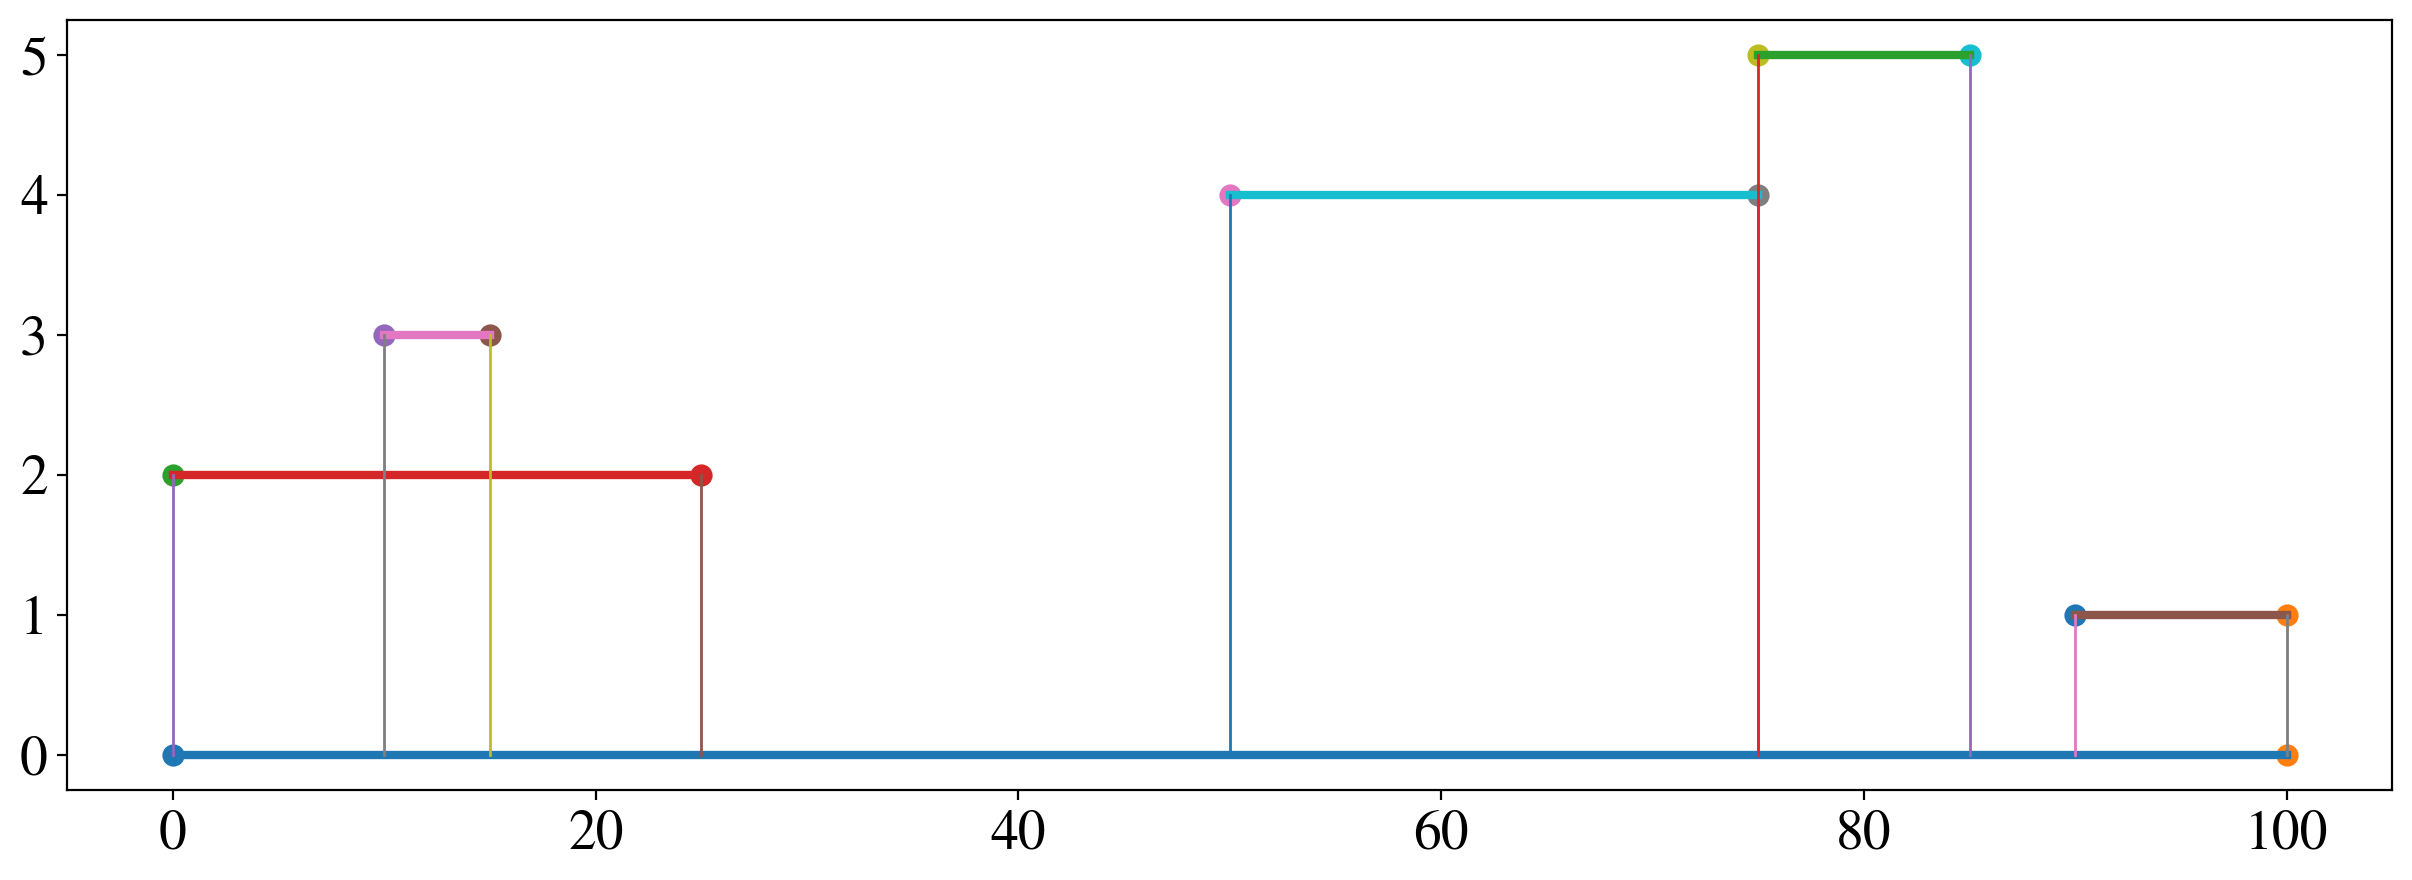

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

for idx, (label, start, stop, length) in enumerate(df.values):
  y = idx % 5 + 1
  if idx == 0:
    y = 0
  ax.plot([start, stop], [y, y], linewidth=3)
  ax.scatter([start], [y], linewidth=2, marker="o")
  ax.scatter([stop], [y], linewidth=2, marker="o")
  ax.plot([start, start], [0, y], linewidth=1)
  ax.plot([stop, stop], [0, y], linewidth=1)

fig.show()

In [26]:
# gaps not filled
gaps = [{
    "id": "A",
    "start": 0,
    "stop": 100,
    "regions": [
        {
            "id": "B",
            "start": 0,
            "stop": 25,
            "regions": [
                {
                    "id": "C",
                    "start": 10,
                    "stop": 15
                }
            ]
        },
        {
            "id": "D",
            "start": 50,
            "stop": 75
        },
        {
            "id": "E",
            "start": 75,
            "stop": 85
        },
        {
            "id": "F",
            "start": 90,
            "stop": 100
        },
    ]
}]

nogaps = [{
    "id": "A",
    "start": 0,
    "stop": 100,
    "regions": [
        {
            "id": "B",
            "start": 0,
            "stop": 25,
            "regions": [
                {
                    "id": "filler_BC",
                    "start": 0,
                    "stop": 10
                },
                {
                    "id": "C",
                    "start": 10,
                    "stop": 15
                },
                {
                    "id": "filler_CB",
                    "start": 15,
                    "stop": 25
                }
            ]
        },
        {
            "id": "filler_BD",
            "start": 25,
            "stop": 50
        },
        {
            "id": "D",
            "start": 50,
            "stop": 75
        },
        {
            "id": "E",
            "start": 75,
            "stop": 85
        },
        {
           "id": "filler_EF",
           "start": 85,
           "stop": 90
        },
        {
            "id": "F",
            "start": 90,
            "stop": 100
        },
    ]
}]

In [9]:
{
    "id": "source",
    "start": 0,
    "stop": 7203,
    "length": 7203,
    "regions": [
        {
            "id": "repeat_region",
            "start": 0,
            "stop": 141,
            "length": 141,
            "regions": [
                {
                    "id": "repeat_region",
                    "start": 11,
                    "stop": 141,
                    "length": 130,
                    "regions": []
                }
            ]
        },
        {
            'id': 'filler_0',
            'start': 141,
            'stop': 155,
            'length': 14,
            'regions': []
            },
        {
            'id': 'promoter',
            'start': 155,
            'stop': 396,
            'length': 241,
            'regions': []
         }
    ]
}

{'id': 'source',
 'start': 0,
 'stop': 7203,
 'length': 7203,
 'regions': [{'id': 'repeat_region',
   'start': 0,
   'stop': 141,
   'length': 141,
   'regions': [{'id': 'repeat_region',
     'start': 11,
     'stop': 141,
     'length': 130,
     'regions': []}]},
  {'id': 'filler_0', 'start': 141, 'stop': 155, 'length': 14, 'regions': []},
  {'id': 'promoter', 'start': 155, 'stop': 396, 'length': 241, 'regions': []}]}

In [29]:
def nest_intervals(intervals):
    def nest(start_index, end_limit):
        nested = []

        i = start_index
        while i < len(intervals) and intervals[i]['start'] < end_limit:
            current_interval = intervals[i]
            child, next_index = nest(i + 1, current_interval['stop'])
            interval_obj = {
                'id': current_interval['id'],
                'start': current_interval['start'],
                'stop': current_interval['stop'],
                'length': current_interval['length'],
                'regions': child
            }
            nested.append(interval_obj)
            i = next_index

        return nested, i

    result, _ = nest(0, intervals[0]['stop'])
    return result[0]

# Example usage
intervals = [
    {'id': 'source', 'start': 0, 'stop': 7203, 'length': 7203},
    {'id': 'repeat_region', 'start': 0, 'stop': 141, 'length': 141},
    {'id': 'repeat_region', 'start': 11, 'stop': 141, 'length': 130},
    {'id': 'filler_0', 'start': 141, 'stop': 155, 'length': 14},
    {'id': 'promoter', 'start': 155, 'stop': 396, 'length': 241}
]

nested_json = nest_intervals(ex)
print(json.dumps(nested_json, indent=4))


{
    "id": "A",
    "start": 0,
    "stop": 100,
    "length": 100,
    "regions": [
        {
            "id": "B",
            "start": 0,
            "stop": 25,
            "length": 25,
            "regions": [
                {
                    "id": "C",
                    "start": 10,
                    "stop": 15,
                    "length": 5,
                    "regions": []
                }
            ]
        },
        {
            "id": "D",
            "start": 50,
            "stop": 75,
            "length": 25,
            "regions": []
        },
        {
            "id": "E",
            "start": 75,
            "stop": 85,
            "length": 10,
            "regions": []
        },
        {
            "id": "F",
            "start": 90,
            "stop": 100,
            "length": 10,
            "regions": []
        }
    ]
}


In [ ]:
# iterate for every element at each level, check the stop of the last dude relative to the start/stop of the parent as well as the distance
# to the next element in the list
# three checks
# 1. interval start > start of parent
# 2. interval stop < stop of parent
# 3. interval stop of i is < interval start of i + 1 (at the same level)

In [33]:
gaps

[{'id': 'A',
  'start': 0,
  'stop': 100,
  'regions': [{'id': 'B',
    'start': 0,
    'stop': 25,
    'regions': [{'id': 'C', 'start': 10, 'stop': 15}]},
   {'id': 'D', 'start': 50, 'stop': 75},
   {'id': 'E', 'start': 75, 'stop': 85},
   {'id': 'F', 'start': 90, 'stop': 100}]}]

In [43]:
def fill_gaps(regions, parent_start = 0, parent_stop = 0):
  if len(regions) == 0:
    return regions

  prev = regions[0]
  e = prev
  if prev["start"] > parent_start:
    # add filler to start of regions
    regions = [{
        "id": "filler",
        "start": parent_start,
        "stop": prev["start"]
    }] + prev["regions"]

  for idx, e in enumerate(regions[1:]):
    if prev["stop"] < e["start"]:
      # insert filler between
      regions[:regions.index(prev)] + {
          "id": "filler",
          "start": prev["stop"],
          "stop": e["start"]
      } + regions[:regions.index(e)]

    prev = e

    if len(e["regions"]) > 0:
      e["regions"] = fill_gaps(e["regions"], e["start"], e["stop"])

  if e["stop"] < parent_stop:
    # add to end of regions
    regions.append({
        "id": "filler",
        "start": e["stop"],
        "stop": parent_stop
    })
  return regions

In [44]:
fill_gaps(gaps)

[{'id': 'A',
  'start': 0,
  'stop': 100,
  'regions': [{'id': 'B',
    'start': 0,
    'stop': 25,
    'regions': [{'id': 'C', 'start': 10, 'stop': 15}]},
   {'id': 'D', 'start': 50, 'stop': 75},
   {'id': 'E', 'start': 75, 'stop': 85},
   {'id': 'F', 'start': 90, 'stop': 100}]}]

In [45]:
nogaps

[{'id': 'A',
  'start': 0,
  'stop': 100,
  'regions': [{'id': 'B',
    'start': 0,
    'stop': 25,
    'regions': [{'id': 'filler_BC', 'start': 0, 'stop': 10},
     {'id': 'C', 'start': 10, 'stop': 15},
     {'id': 'filler_CB', 'start': 15, 'stop': 25}]},
   {'id': 'filler_BD', 'start': 25, 'stop': 50},
   {'id': 'D', 'start': 50, 'stop': 75},
   {'id': 'E', 'start': 75, 'stop': 85},
   {'id': 'filler_EF', 'start': 85, 'stop': 90},
   {'id': 'F', 'start': 90, 'stop': 100}]}]

In [47]:
def fill_gaps(regions, parent_start=0, parent_stop=0):
    if len(regions) == 0:
        return []

    # Insert a filler at the start if necessary
    if regions[0]['start'] > parent_start:
        regions.insert(0, {
            'id': 'filler_start',
            'start': parent_start,
            'stop': regions[0]['start']
        })

    new_regions = []
    for i, region in enumerate(regions):
        # Append the current region
        new_regions.append(region)

        # Recursive call for nested regions
        if 'regions' in region:
            region['regions'] = fill_gaps(region['regions'], region['start'], region['stop'])

        # Check for gap and insert a filler
        if i < len(regions) - 1 and region['stop'] < regions[i+1]['start']:
            filler_id = f'filler_{region["id"]}_{regions[i+1]["id"]}'
            new_regions.append({
                'id': filler_id,
                'start': region['stop'],
                'stop': regions[i+1]['start']
            })

    # Insert a filler at the end if necessary
    if new_regions[-1]['stop'] < parent_stop:
        new_regions.append({
            'id': 'filler_end',
            'start': new_regions[-1]['stop'],
            'stop': parent_stop
        })

    return new_regions

# Example usage
filled_regions = fill_gaps(gaps)


In [48]:
filled_regions

[{'id': 'A',
  'start': 0,
  'stop': 100,
  'regions': [{'id': 'B',
    'start': 0,
    'stop': 25,
    'regions': [{'id': 'filler_start', 'start': 0, 'stop': 10},
     {'id': 'C', 'start': 10, 'stop': 15},
     {'id': 'filler_end', 'start': 15, 'stop': 25}]},
   {'id': 'filler_B_D', 'start': 25, 'stop': 50},
   {'id': 'D', 'start': 50, 'stop': 75},
   {'id': 'E', 'start': 75, 'stop': 85},
   {'id': 'filler_E_F', 'start': 85, 'stop': 90},
   {'id': 'F', 'start': 90, 'stop': 100}]}]